In [1]:
library(cmdstanr)

check_cmdstan_toolchain()

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/seijmura/.cmdstan/cmdstan-2.30.1

- CmdStan version: 2.30.1

The C++ toolchain required for CmdStan is setup properly!



In [2]:
#install_cmdstan(cores = 2)

In [3]:
path <- "/Users/seijmura/.cmdstan/cmdstan-2.30.1"
set_cmdstan_path(path)
file <- file.path(cmdstan_path(), "examples", "bernoulli", "bernoulli.stan")
model <- cmdstan_model(file)

CmdStan path set to: /Users/seijmura/.cmdstan/cmdstan-2.30.1



In [4]:
model$print()

data {
  int<lower=0> N;
  array[N] int<lower=0,upper=1> y; // or int<lower=0,upper=1> y[N];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ beta(1,1);  // uniform prior on interval 0,1
  y ~ bernoulli(theta);
}


In [5]:
data_list <- list(N = 10, y = c(0,1,0,0,0,0,0,0,0,1))

fit <- model$sample(
  data = data_list, 
  seed = 123, 
  chains = 4, 
  parallel_chains = 4,
  refresh = 500 # print update every 500 iters
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Ite

In [6]:
fit$summary()

variable mean       median    sd        mad       q5          q95       
1 lp__     -7.2699630 -6.980165 0.7252997 0.3167427 -8.76275800 -6.7508255
2 theta     0.2471785  0.231727 0.1186090 0.1203856  0.07839292  0.4609424
  rhat     ess_bulk ess_tail
1 1.001512 1910.359 1725.732
2 1.001485 1529.890 1574.637

In [8]:
library(tidyverse)


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [9]:


set.seed(123)
N <- 100
alpha <- 3
beta <- 2
sigma <- 4
X <- rnorm(N, 5, 2)
Y <- alpha + beta*X + rnorm(N, 0, sigma)
result <- lm(Y ~ X)
result %>%  summary()
plot(X,Y)
abline(result)


Call:
lm(formula = Y ~ X)

Residuals:
   Min     1Q Median     3Q    Max 
-7.629 -2.734 -0.350  2.322 13.162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1135     1.1735   2.653  0.00931 ** 
X             1.8951     0.2138   8.865  3.5e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.883 on 98 degrees of freedom
Multiple R-squared:  0.4451,	Adjusted R-squared:  0.4394 
F-statistic:  78.6 on 1 and 98 DF,  p-value: 3.497e-14


In [10]:
datastan_reg <- list(
  N = N,
  Y = Y,
  X = X
)

model_reg <- cmdstan_model("reg.stan") 

fit_reg <- model_reg$sample(datastan_reg,
                 iter_warmup = 1000,
                 iter_sampling = 1000,
                 chains = 4,
                 parallel_chains = 4)


Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Itera

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/0w/2f3vz6qd05d457_6c72qxl980000gn/T/RtmpGSoBa7/model-f31477c7078.stan', line 22, column 4 to column 32)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 finished in 0.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.2 seconds.



In [11]:

fit_reg$print(c("alpha","beta"))


 variable mean median   sd  mad   q5  q95 rhat ess_bulk ess_tail
    alpha 3.05   3.06 1.20 1.17 1.05 4.98 1.00     1441     1593
    beta  1.90   1.90 0.22 0.21 1.55 2.26 1.00     1499     1571


In [14]:
library(bayesplot)
#収束の判定
fit_reg %>% bayesplot::rhat() %>% hist



This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



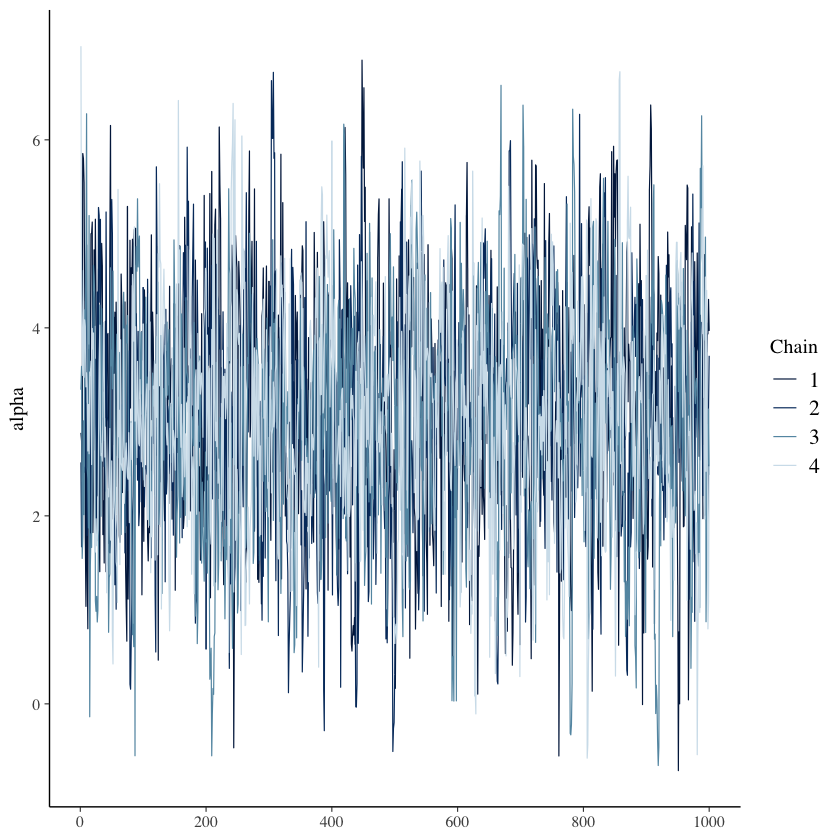

In [15]:

#トレースプロット
fit_reg$draws("alpha") %>% mcmc_trace


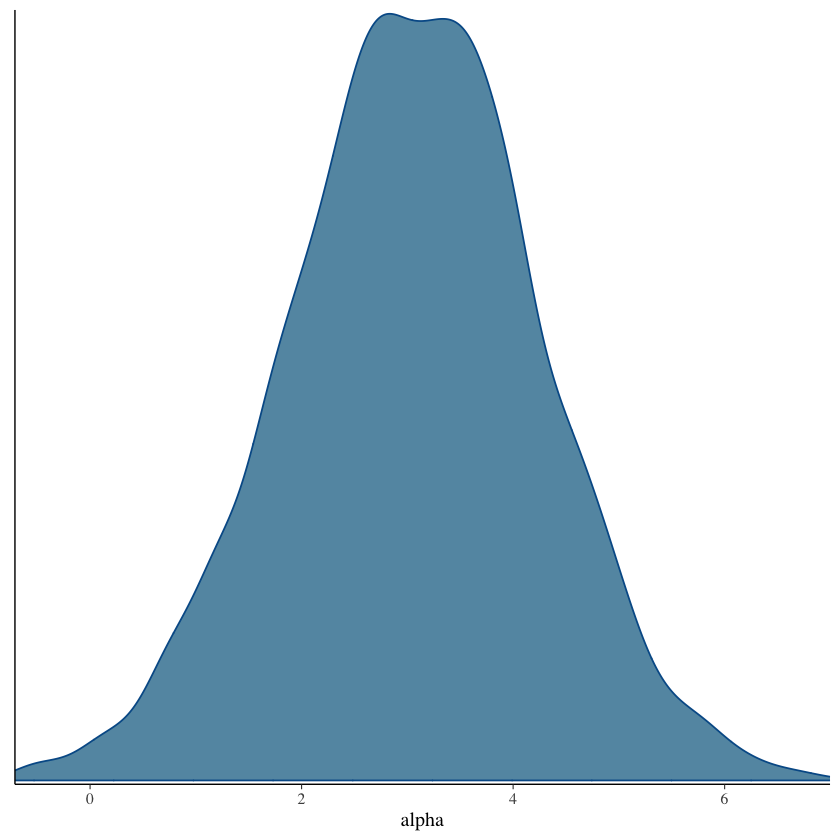

In [16]:

#事後分布
fit_reg$draws("alpha") %>% mcmc_dens


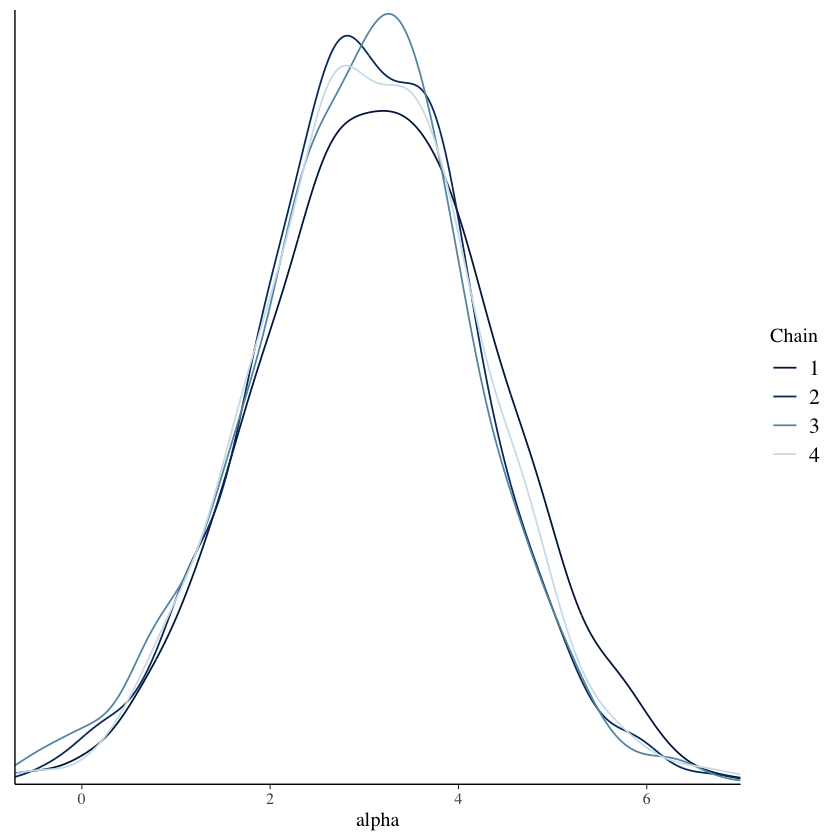

In [17]:

fit_reg$draws("alpha") %>% mcmc_dens_overlay